In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [244]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', False)

In [245]:
data=pd.read_csv("data.csv")

In [246]:
df=data.copy()

In [247]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,1.035990e-03,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.0049

# EDA

In [248]:
df.duplicated().sum()

0

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [250]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,3.226280e-02,1.767102e-01,0.0,0.000000,0.000000,0.000000,1.000000e+00
ROA(C) before interest and depreciation before interest,6819.0,5.051796e-01,6.068564e-02,0.0,0.476527,0.502706,0.535563,1.000000e+00
ROA(A) before interest and % after tax,6819.0,5.586249e-01,6.562003e-02,0.0,0.535543,0.559802,0.589157,1.000000e+00
ROA(B) before interest and depreciation after tax,6819.0,5.535887e-01,6.159481e-02,0.0,0.527277,0.552278,0.584105,1.000000e+00
Operating Gross Margin,6819.0,6.079480e-01,1.693381e-02,0.0,0.600445,0.605997,0.613914,1.000000e+00
Realized Sales Gross Margin,6819.0,6.079295e-01,1.691607e-02,0.0,0.600434,0.605976,0.613842,1.000000e+00
Operating Profit Rate,6819.0,9.987551e-01,1.301003e-02,0.0,0.998969,0.999022,0.999095,1.000000e+00
Pre-tax net Interest Rate,6819.0,7.971898e-01,1.286899e-02,0.0,0.797386,0.797464,0.797579,1.000000e+00
After-tax net Interest Rate,6819.0,8.090836e-01,1.360065e-02,0.0,0.809312,0.809375,0.809469,1.000000e+00
...,...,...,...,...,...,...,...,...


In [251]:
df.isna().sum().sum()

0

In [252]:
df["Bankrupt?"].value_counts()/len(df)

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

In [311]:
# unbalanced target data

In [253]:
nuni={i:df[i].nunique() for i in df.columns}
nuni

{'Bankrupt?': 2,
 ' ROA(C) before interest and depreciation before interest': 3333,
 ' ROA(A) before interest and % after tax': 3151,
 ' ROA(B) before interest and depreciation after tax': 3160,
 ' Operating Gross Margin': 3781,
 ' Realized Sales Gross Margin': 3788,
 ' Operating Profit Rate': 3376,
 ' Pre-tax net Interest Rate': 3789,
 ' After-tax net Interest Rate': 3604,
 ' Non-industry income and expenditure/revenue': 2551,
 ' Continuous interest rate (after tax)': 3617,
 ' Operating Expense Rate': 2966,
 ' Research and development expense rate': 1536,
 ' Cash flow rate': 5557,
 ' Interest-bearing debt interest rate': 1080,
 ' Tax rate (A)': 2488,
 ' Net Value Per Share (B)': 2278,
 ' Net Value Per Share (A)': 2285,
 ' Net Value Per Share (C)': 2284,
 ' Persistent EPS in the Last Four Seasons': 1358,
 ' Cash Flow Per Share': 1545,
 ' Revenue Per Share (Yuan ¥)': 3807,
 ' Operating Profit Per Share (Yuan ¥)': 1236,
 ' Per Share Net profit before tax (Yuan ¥)': 1522,
 ' Realized Sale

In [254]:
index_=[]
value_=[]
for key,value in nuni.items():
    index_.append(key)
    value_.append(value)


In [255]:
pd.DataFrame(value_, index=index_, columns=["amount of unique"]).sort_values(by="amount of unique")

,amount of unique
Net Income Flag,1
Bankrupt?,2
Liability-Assets Flag,2
Total Asset Turnover,381
Net Worth Turnover Rate (times),741
Interest-bearing debt interest rate,1080
Operating Profit Per Share (Yuan ¥),1236
Persistent EPS in the Last Four Seasons,1358
Per Share Net profit before tax (Yuan ¥),1522
...,...


In [256]:
df[" Liability-Assets Flag"].value_counts(normalize=True)

0    0.998827
1    0.001173
Name:  Liability-Assets Flag, dtype: float64

In [257]:
df.drop([" Liability-Assets Flag", " Net Income Flag"], axis=1, inplace=True)

In [258]:
col_names=[]
for i in df.columns:
    for j in df[i].value_counts(normalize=True):
        if j>0.90:
            col_names.append(i)

In [259]:
col_names

['Bankrupt?']

# Train Test Split

In [240]:
X=df.drop('Bankrupt?',1)
y=df['Bankrupt?']

In [260]:
X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.25, stratify=y)

## Synthetic Minority Over-Sampling Technique

In [261]:
from imblearn.over_sampling import SMOTE

In [264]:
oversample = SMOTE()
X_train,y_train=oversample.fit_resample(X_train,y_train)

## Skewed some columns

In [262]:
for i in X_train.columns:
    if abs(X_train[i].skew())>0.5:
        X_train[i]=np.log1p(X_train[i])

In [263]:
for i in X_test.columns:
    if abs(X_test[i].skew())>0.5:
        X_test[i]=np.log1p(X_test[i])

## Scaled data sets

In [265]:
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test=pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)

# Modelling

In [266]:
models={
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Cat Boost": CatBoostClassifier(silent=True),
    "Gradient": GradientBoostingClassifier()
}

In [219]:
for name,model in models.items():
    model.fit(X_train, y_train)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_train,y_train),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=model.predict(X_test)
    print(f"precision score: {round(precision_score(y_test, y_pred),2)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),2)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),2)}")

---------------------------------------------------
Logistic Regression-train score: 0.9279
Logistic Regression-test score: 0.9683
precision score: 0.52
recall score: 0.24
f1 score: 0.32
---------------------------------------------------
KNN-train score: 0.9694
KNN-test score: 0.9191
precision score: 0.19
recall score: 0.47
f1 score: 0.27
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.9689
precision score: 0.6
recall score: 0.11
f1 score: 0.18
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.9707
precision score: 0.58
recall score: 0.35
f1 score: 0.43
---------------------------------------------------
LightGBM-train score: 1.0
LightGBM-test score: 0.9707
precision score: 0.59
recall score: 0.29
f1 score: 0.39
---------------------------------------------------
Decision Tree-train score: 1.0
Decision Tree-test score: 0.9419
precision score: 0.16
recall score: 0.18
f1 score

In [270]:
for name,model in models.items():
    model.fit(X_train, y_train)
    print("---------------------------------------------------")
    print(name+"-"+f"train score: {round(model.score(X_train,y_train),4)}")
    print(name+"-"+f"test score: {round(model.score(X_test,y_test),4)}")
    y_pred=(model.predict_proba(X_test)[:,1] >= 0.1).astype(bool)
    print(f"precision score: {round(precision_score(y_test, y_pred),2)}")
    print(f"recall score: {round(recall_score(y_test, y_pred),2)}")
    print(f"f1 score: {round(f1_score(y_test, y_pred),2)}")

---------------------------------------------------
Logistic Regression-train score: 0.9181
Logistic Regression-test score: 0.0575
precision score: 0.03
recall score: 1.0
f1 score: 0.06
---------------------------------------------------
KNN-train score: 0.964
KNN-test score: 0.9507
precision score: 0.25
recall score: 0.55
f1 score: 0.35
---------------------------------------------------
Random Forest-train score: 1.0
Random Forest-test score: 0.9619
precision score: 0.13
recall score: 0.95
f1 score: 0.22
---------------------------------------------------
XGBoost-train score: 1.0
XGBoost-test score: 0.963
precision score: 0.4
recall score: 0.76
f1 score: 0.52
---------------------------------------------------
LightGBM-train score: 1.0
LightGBM-test score: 0.9642
precision score: 0.35
recall score: 0.82
f1 score: 0.49
---------------------------------------------------
Decision Tree-train score: 1.0
Decision Tree-test score: 0.9378
precision score: 0.26
recall score: 0.51
f1 score: 0

#### Random Forest - LightGBM - Gradient Boosting have best recall scores

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1650
           1       0.35      0.82      0.49        55

    accuracy                           0.95      1705
   macro avg       0.67      0.88      0.73      1705
weighted avg       0.97      0.95      0.96      1705



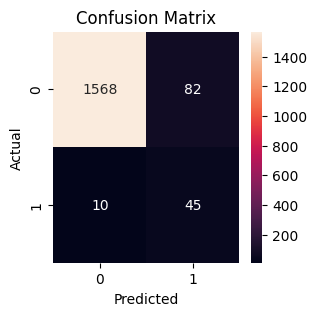

In [304]:
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
#y_pred=lgbm.predict(X_test)
y_pred=(lgbm.predict_proba(X_test)[:,1] >= 0.1).astype(bool)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='d', annot=True )
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.83      0.91      1650
           1       0.15      0.87      0.25        55

    accuracy                           0.83      1705
   macro avg       0.57      0.85      0.58      1705
weighted avg       0.97      0.83      0.89      1705



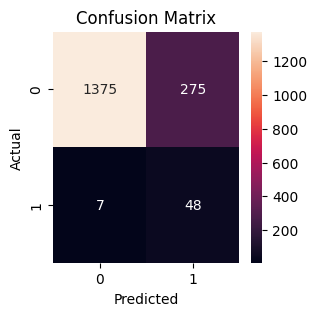

In [305]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
#y_pred=gb.predict(X_test)
y_pred=(gb.predict_proba(X_test)[:,1] >= 0.1).astype(bool)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='d', annot=True )
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1650
           1       0.12      0.95      0.22        55

    accuracy                           0.78      1705
   macro avg       0.56      0.86      0.54      1705
weighted avg       0.97      0.78      0.85      1705



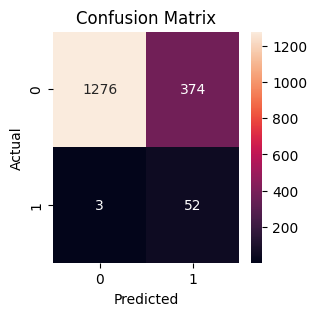

In [306]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train,y_train)
#y_pred=gb.predict(X_test)
y_pred=(random_forest.predict_proba(X_test)[:,1] >= 0.1).astype(bool)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='d', annot=True )
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

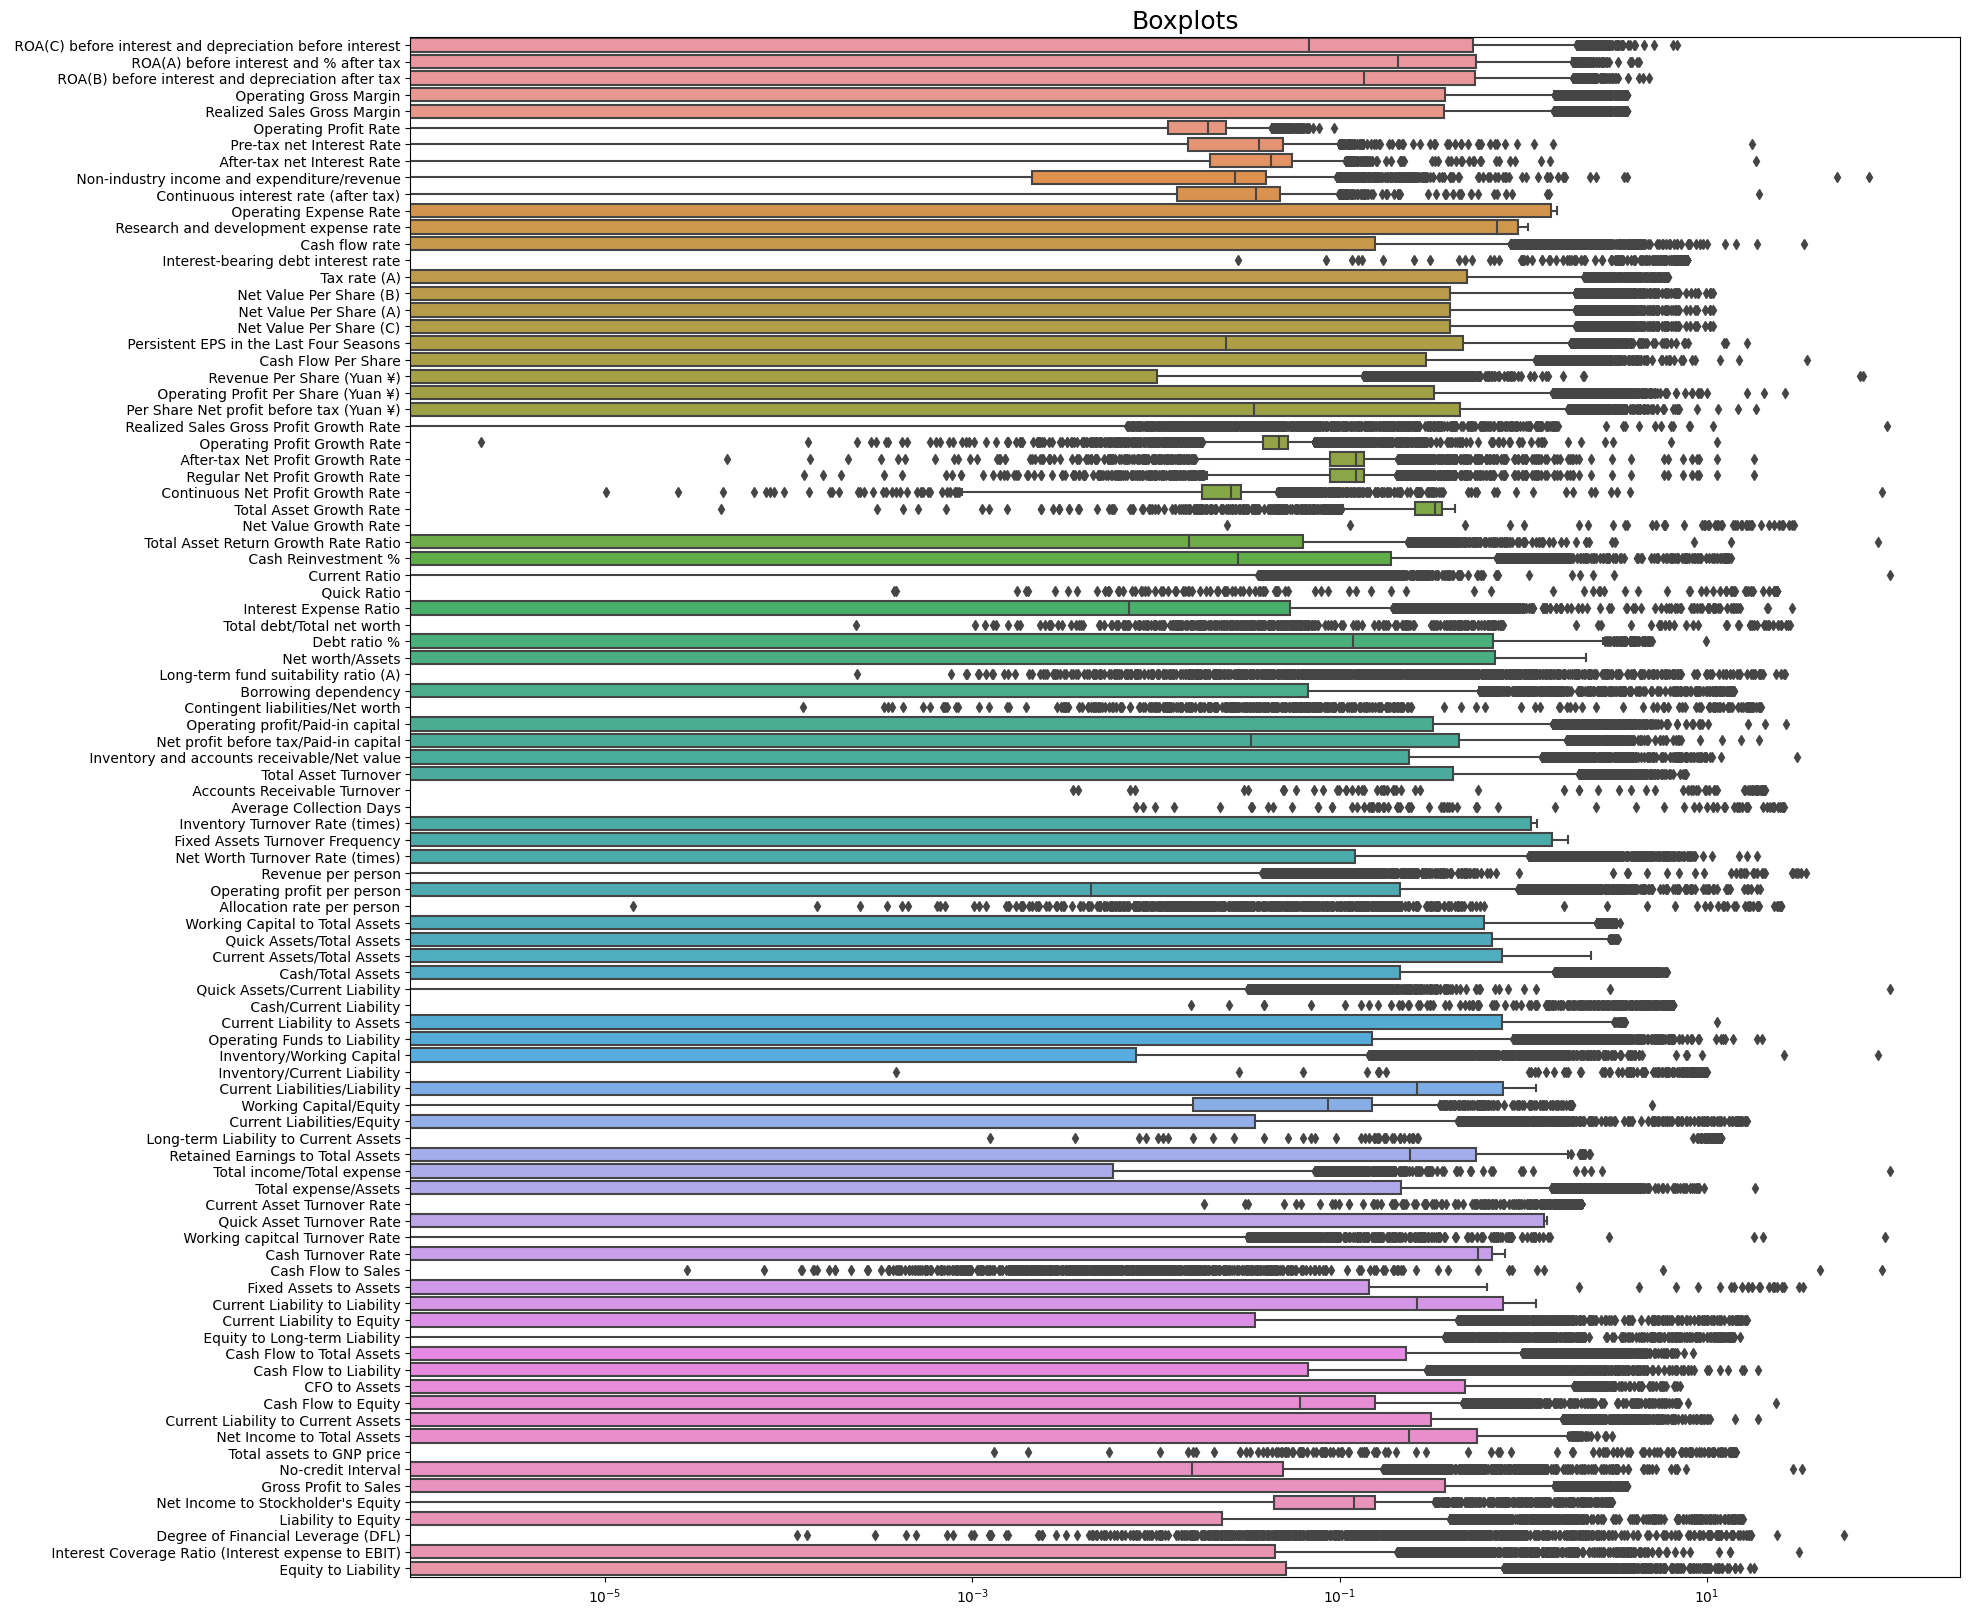

In [309]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(X_train, orient="h")
ax.set_title('Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

# Ensemble classification

### Random Forest - LightGBM - Gradient Boosting

In [284]:
y_pred_random=(random_forest.predict_proba(X_test)[:,1] >= 0.1).astype(bool)
y_pred_random=[*map(lambda x: 1 if x==True else 0, y_pred_random)]

In [286]:
y_pred_gb=(gb.predict_proba(X_test)[:,1] >= 0.1).astype(bool)
y_pred_gb=[*map(lambda x: 1 if x==True else 0, y_pred_gb)]

In [288]:
y_pred_lgbm=(lgbm.predict_proba(X_test)[:,1] >= 0.1).astype(bool)
y_pred_lgbm=[*map(lambda x: 1 if x==True else 0, y_pred_lgbm)]

In [290]:
tablo=pd.DataFrame({"y_pred_random":y_pred_random, "y_pred_gb":y_pred_gb, "y_pred_lgbm":y_pred_lgbm})

In [292]:
tablo["ens"]=tablo["y_pred_random"]+tablo["y_pred_gb"]+tablo["y_pred_lgbm"]

In [294]:
tablo["ensemble"]=tablo["ens"].apply(lambda x: 1 if x>1 else 0)

In [299]:
y_pred_ens=tablo["ensemble"]

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1650
           1       0.17      0.87      0.28        55

    accuracy                           0.86      1705
   macro avg       0.58      0.86      0.60      1705
weighted avg       0.97      0.86      0.90      1705



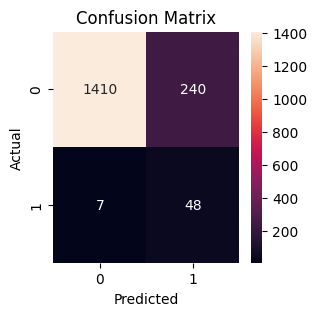

In [300]:
print(classification_report(y_test, y_pred_ens))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred_ens), fmt='d', annot=True )
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()